# Iris Classification (붓꽃 품종 분류)

사이킷런(sklearn) 패키지에 내장된 `iris` 데이터셋  

## 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sklearn 데이터셋에서 iris 데이터셋 로딩
from sklearn import datasets
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# DESCR 키를 통해 데이터셋 설명(Description) 보기
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

▶ 알 수 있는 정보
* 150개 샘플 데이터
* 4가지 피처(feature, 설명변수)
* 3클래스 타깃(target, 목표변수)

3가지 품종 중에서 하나를 선택하는 다중 분류(multi classification) 문제다.

In [4]:
# target 속성 - target 데이터 보기
print('The shape of target dataset:', iris['target'].shape)
print(iris['target'])

The shape of target dataset: (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# data 속성 - feature 데이터 보기
print('The shape of feature dataset:', iris['data'].shape)
print(iris['data'][:10, :])

The shape of feature dataset: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
# 데이터프레임 변환
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

print("The shape of feature dataset:", df.shape)
df.head()

The shape of feature dataset: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# 컬럼명 수정
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [8]:
# Target 컬럼 추가
df['Target'] = iris['target']

print("The shape of dataset:", df.shape)
df.head()

The shape of dataset: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 데이터 탐색

### 데이터셋의 기본 정보

In [9]:
# 데이터셋의 기본 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### 통계 정보 요약

In [10]:
# 통계 정보 요약
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 결측값 확인

In [11]:
# 결측값 확인
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

### 중복 데이터 확인

동일한 샘플이 중복되어 존재하는지 체크한다.

In [12]:
# 중복데이터 확인
df.duplicated().sum()

1

In [13]:
df.loc[df.duplicated(), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
142,5.8,2.7,5.1,1.9,2


In [14]:
# 중복 데이터 모두 출력
df.loc[(df.sepal_length==5.8) & (df.sepal_width==2.7), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
67,5.8,2.7,4.1,1.0,1
82,5.8,2.7,3.9,1.2,1
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [15]:
# 중복 데이터 제거
df = df.drop_duplicates()
df.isnull().sum().sum()

0

### 상관관계 분석
`corr()` : 변수 간 상관 계수 행렬 출력

In [16]:
# 변수 간 상관관계 분석
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


### 데이터 시각화

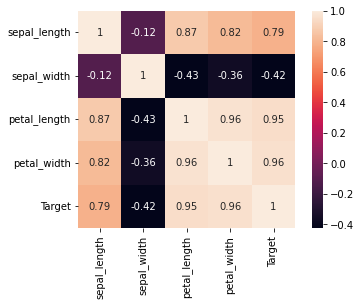

In [17]:
# 상관계수 히트맵
sns.heatmap(data=df.corr(), annot=True, cbar=True, square=True);

In [18]:
# Target 값의 분포
df['Target'].value_counts()

0    50
1    50
2    49
Name: Target, dtype: int64

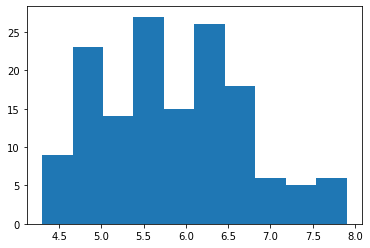

In [19]:
# sepal_length 값의 분포 - plt.hist()
plt.hist(x='sepal_length', data=df);

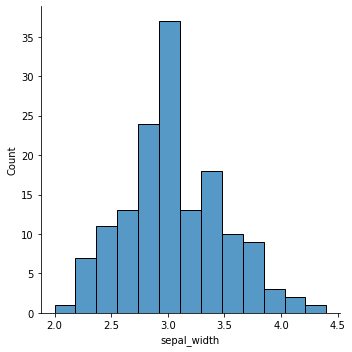

In [20]:
# sepal_width 값의 분포 - sns.displot(kind='hist')
sns.displot(x='sepal_width', data=df, kind='hist');

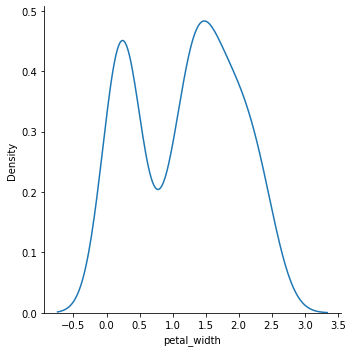

In [21]:
# petal_width 값의 분포 - displot(kind='kde')
sns.displot(x='petal_width', data=df, kind='kde');

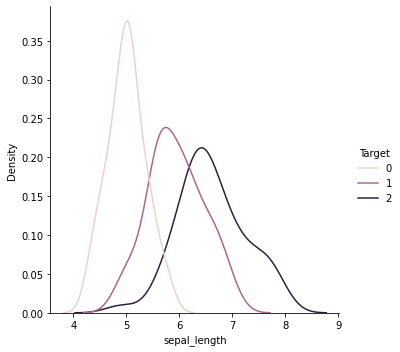

In [22]:
# 품종별 sepal_length 값의 분포 비교
sns.displot(x='sepal_length', hue='Target', data=df, kind='kde');

▶ `sepal_length`  
* `Target` 변수의 클래스(0,1,2)에 따라 분포에 차이가 있다. 따라서 모델 학습에 고려해야 하는 유의한 피처로 보인다. 
* 특히 클래스 0의 꽃받침 길이가 짧은 편이다.

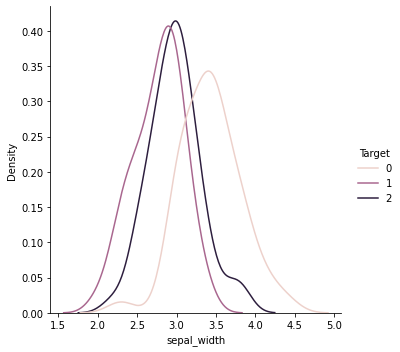

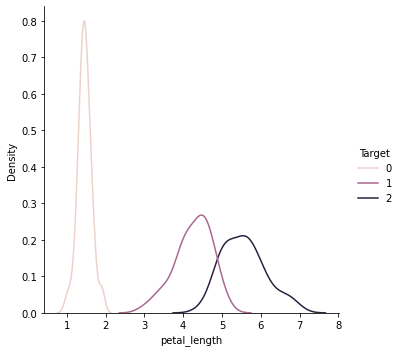

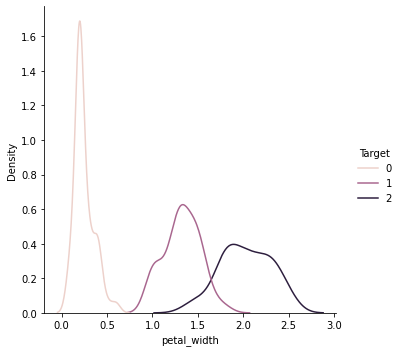

In [23]:
# 나머지 3개 피처에 대해서도 한번에 그래프 출력
for col in ['sepal_width', 'petal_length', 'petal_width']:
    sns.displot(x=col, hue='Target', data=df, kind='kde');

▶ `sepal_width`  
* 클래스 0의 분포가 다른 두 품종의 분포에 비해 오른쪽으로 중심이 이동되어 있다.
* 즉 너비 방향으로 폭이 넓은 편이다.
    
▶ `petal_length`와 `petal_width`  
* 역시 품종별로 분포가 다르다. 분포의 중심 위치가 다르고, 데이터가 퍼져 있는 정도(분산)에도 차이가 있다.

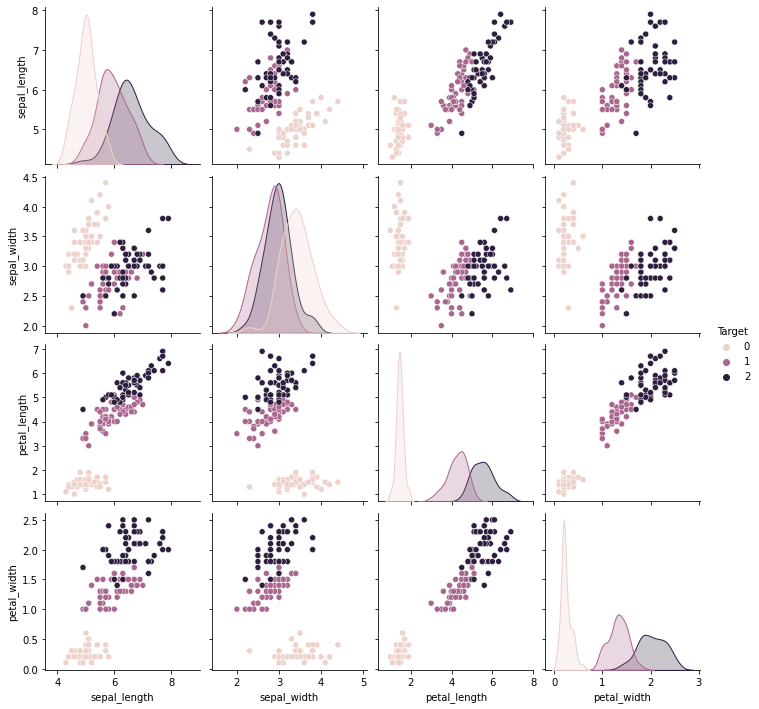

In [24]:
# pairplot() - 서로 다른 피처 간 관계를 나타내는 그래프를 한번에 그릴 수 있다
sns.pairplot(data=df, hue='Target', diag_kind='kde', height=2.5);

## train/test 데이터셋 분할

모델 학습에 사용할 훈련(train) 세트와, 모델 성능을 평가하는데 사용할 테스트(test) 세트를 분할한다.  
사이킷런 `train_test_split()`을 사용하면 편리하게 나눌 수 있다.

모델 학습에 사용할 피처로 4개 열을 선택하고 입력 데이터(`X`)에 할당하고, 목표 레이블(`y`)에 `Target`열을 지정한다.

In [25]:
from sklearn.model_selection import train_test_split

X = df.loc[:, 'sepal_length':'petal_width']
y = df.loc[:, 'Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(119, 4) (119,)
(30, 4) (30,)


* 전체 데이터의 20%를 테스트용으로, 나머지 80%를 훈련용으로 분할했다. 즉 전체 149개 샘플 중 80%인 119개는 훈련 데이터(`X_train`, `y_train`), 나머지 20% 샘플 30개는 테스트 데이터(`X_test`, `y_test`)로 분할되었다.

## 분류 알고리즘

### 분류 알고리즘 (1) ― KNN

KNN(K-Nearest-Neighbors, k-최근접 이웃) 분류 알고리즘은 가장 간단한 머신러닝 알고리즘 중 하나다. 예측하려는 데이터 X가 주어지면, 기존 데이터 중 속성이 비슷한 K개의 이웃을 먼저 찾는다. 즉 데이터 X를 둘러싼 K개의 가장 가까운 이웃을 찾고, 이웃 데이터가 가장 많이 속해 있는 목표 클래스를 예측값으로 결정한다.

K값에 따라 모델의 예측력이 달라지므로 적절히 값을 설정해야 한다. (`n_neighbors`의 하이퍼파라미터 튜닝)
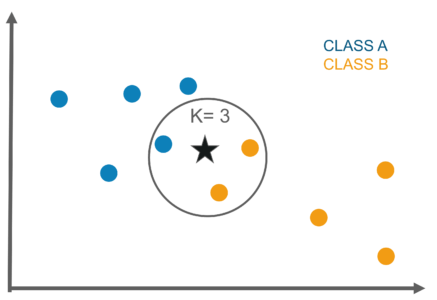

In [26]:
# 모델 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
# 예측
y_knn_pred = knn.predict(X_test)
print("예측값: ", y_knn_pred)

예측값:  [2 2 0 0 0 0 0 1 1 2 0 0 2 2 0 1 2 0 0 0 0 0 1 0 1 1 2 0 1 0]


In [28]:
# 성능 평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print(f"Accuracy: {knn_acc:.4f}")

Accuracy: 0.9667


### 분류 알고리즘 (2) ― SVM

SVM(Support Vector Machine)은 데이터셋의 각 피처(열) 벡터들이 고유의 축을 갖는 벡터 공간을 이룬다고 가정한다. 모든 데이터를 벡터 공간 내의 좌표에 점으로 표시하고, 각 데이터가 속하는 목표 클래스별로 군집을 이룬다고 생각한다.  
이때 각 군집까지의 거리(margin)를 최대한 멀리 유지하는 경계면을 찾는다. 이렇게 하면 각 군집을 서로 확연하게 구분할 수 있다.
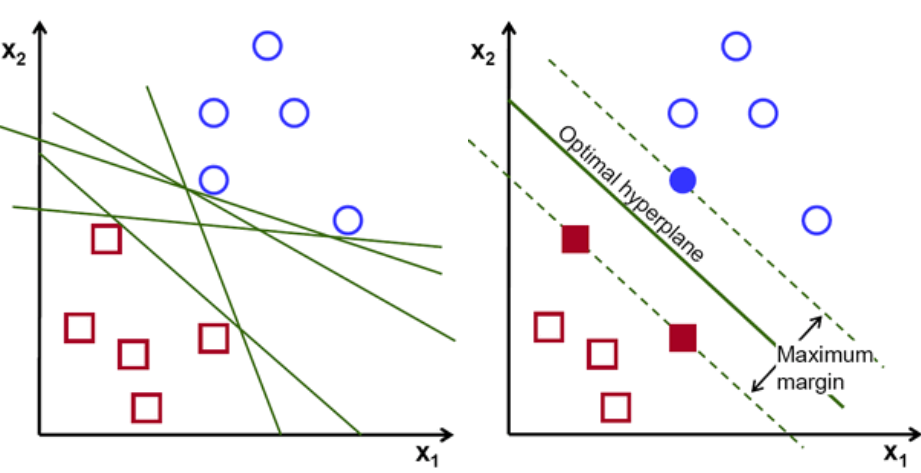

In [29]:
# 모델 학습
from sklearn.svm import SVC
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

`kernel`은 데이터를 벡터 공간으로 매핑하는 함수를 말하며, `rbf`는 'Radial Basis Fuction'을 뜻한다. (수학적 설명 생략)

In [30]:
# 예측
y_svc_pred = svc.predict(X_test)
print("예측값: ", y_svc_pred)

#성능 평가
svc_acc = accuracy_score(y_test, y_svc_pred)
print(f"Accuracy: {svc_acc:.4f}")

예측값:  [2 2 0 0 0 0 0 1 1 2 0 0 1 2 0 1 2 0 0 0 0 0 1 0 1 1 2 0 1 0]
Accuracy: 1.0000


### 분류 알고리즘 (3) ― 로지스틱 회귀

로지스틱 회귀(Logistic Regression)는 회귀라는 이름을 사용하지만, 실제론 선형 방정식을 사용한 분류 알고리즘이다. 계산값을 그대로 반환하는 선형 회귀와는 달리, 로지스틱 회귀는 시그모이드(이진 분류)나 소프트맥스(다중 분류) 함수를 사용해 0~1 사이로 압축된 클래스 확률을 구할 수 있다.

In [31]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(n_jobs=-1)
lrc.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [32]:
# 예측
y_lrc_pred = lrc.predict(X_test)
print("예측값: ", y_lrc_pred)

# 성능 평가
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print(f"Accuracy: {lrc_acc:.4f}")

예측값:  [2 2 0 0 0 0 0 1 1 2 0 0 2 2 0 1 2 0 0 0 0 0 1 0 1 1 2 0 1 0]
Accuracy: 0.9667


In [33]:
# 클래스별 확률 예측값 - predict_proba()
y_lrc_pred = lrc.predict_proba(X_test)
y_lrc_pred

array([[7.69343321e-04, 4.83086904e-01, 5.16143752e-01],
       [1.18719960e-08, 1.86739832e-03, 9.98132590e-01],
       [9.83441384e-01, 1.65585776e-02, 3.83332353e-08],
       [9.68185332e-01, 3.18145955e-02, 7.20628175e-08],
       [9.71007157e-01, 2.89927722e-02, 7.10537389e-08],
       [9.44317527e-01, 5.56822733e-02, 2.00098947e-07],
       [9.63575299e-01, 3.64242236e-02, 4.76912528e-07],
       [6.64438059e-03, 9.17011848e-01, 7.63437713e-02],
       [1.94123943e-02, 9.49212538e-01, 3.13750678e-02],
       [1.06396650e-05, 2.73187535e-02, 9.72670607e-01],
       [9.78638629e-01, 2.13612896e-02, 8.17805086e-08],
       [9.63074548e-01, 3.69253147e-02, 1.37049709e-07],
       [2.88884557e-03, 3.97111444e-01, 5.99999711e-01],
       [3.38882907e-04, 1.52583333e-01, 8.47077784e-01],
       [9.84479266e-01, 1.55207033e-02, 3.06430742e-08],
       [1.23462680e-02, 7.00764726e-01, 2.86889006e-01],
       [3.83156266e-05, 7.45347738e-02, 9.25426911e-01],
       [9.59945704e-01, 4.00541

### 분류 알고리즘 (4) ― Decision Tree

Decision Tree(의사결정트리) 모델은 트리 모델의 기본이 되는 알고리즘이다. 예/아니오에 대한 질문을 이어나가면서 정답을 찾아 학습하는 방식으로, 간단한 시각화를 통해 이해하기가 쉽고 성능도 좋다. 그런데 이때 `max_depth`를 적절히 설정해 오버피팅을 야기하지 않도록 해야 한다.  
트리 모델에선 feature importance를 구할 수 있는데, 불순도를 구하는 방법으로 지니 계수 또는 엔트로피의 개념이 등장한다.

In [34]:
# 모델 학습
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
# 예측
y_dtc_pred = dtc.predict(X_test)
print("예측값: ", y_dtc_pred)

# 성능 평가
dtc_acc = accuracy_score(y_test, y_dtc_pred)
print(f"Accuracy: {dtc_acc:.4f}")

예측값:  [1 2 0 0 0 0 0 1 1 2 0 0 2 2 0 1 2 0 0 0 0 0 1 0 1 1 2 0 1 0]
Accuracy: 0.9333


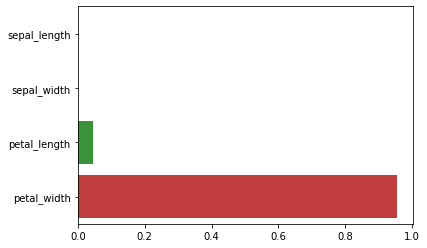

In [36]:
# tree 계열 알고리즘의 feature importance 그래프
importance = dtc.feature_importances_
features_names = df.columns.tolist()
features_names.remove('Target')
_ = sns.barplot(x=importance, y=features_names)

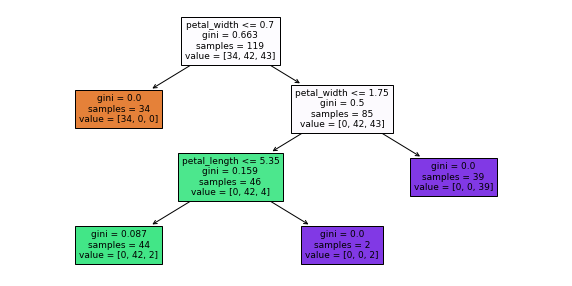

In [37]:
# 결정 트리 모델 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 5))
plot_tree(dtc, filled=True, feature_names=features_names, max_depth=3, fontsize=9);

이러한 Decision Tree(의사결정 트리)는 많은 앙상블 학습 알고리즘의 기반이 된다.

## 앙상블 모델

앙상블(Ensemble) 모델은 보다 더 좋은 예측 결과를 내기 위해 여러 모델의 예측값을 결합하여 최종 예측값을 결정하는 방법이다. 하나의 모델 예측에 의존하는 것보다 여러 모델의 예측을 종합하면 모델의 예측력은 일반적으로 좋은 편이다. 대신 개별 모델에 비해 학습 시간이 오래 걸린다는 단점이 있다.

앙상블 학습은 정형 데이터에서 가장 뛰어난 성능을 내는 대표적인 머신러닝 알고리즘이다. ⭐

### 앙상블 모델 (1) ― Voting(보팅)

#### Hard voting

In [38]:
# 모델 학습 및 검증
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN', knn), ('SVM', svc), ('DT', dtc)],
                      voting='hard', n_jobs=-1)
hvc.fit(X_train, y_train)

y_hvc_pred = hvc.predict(X_test)
print("예측값:", y_hvc_pred)

hvc_acc = accuracy_score(y_test, y_hvc_pred)
print(f"Accuracy: {hvc_acc:.4f}")

예측값: [2 2 0 0 0 0 0 1 1 2 0 0 2 2 0 1 2 0 0 0 0 0 1 0 1 1 2 0 1 0]
Accuracy: 0.9667


#### Soft voting

In [39]:
# 모델 학습 및 검증
from sklearn.ensemble import VotingClassifier
sftvc = VotingClassifier(estimators=[('KNN', knn), ('SVM', svc), ('DT', dtc)],
                      voting='soft', n_jobs=-1)
sftvc.fit(X_train, y_train)

y_sftvc_pred = sftvc.predict(X_test)
print("예측값:", y_sftvc_pred)

sftvc_acc = accuracy_score(y_test, y_sftvc_pred)
print(f"Accuracy: {sftvc_acc:.4f}")

예측값: [1 2 0 0 0 0 0 1 1 2 0 0 2 2 0 1 2 0 0 0 0 0 1 0 1 1 2 0 1 0]
Accuracy: 0.9333


#### Hard voting VS. Soft voting

voting 옵션
* `hard`: 여러 분류기 모델의 <u>예측값</u> 중 많은 것을 선택 (다수결)
* `soft`: 여러 분류기 모델이 예측한 <u>클래스별 확률을 평균내</u> 평균 획률이 가장 높은 클래스를 선택. 보통 이게 성능이 좋아서 더 많이 쓰인다

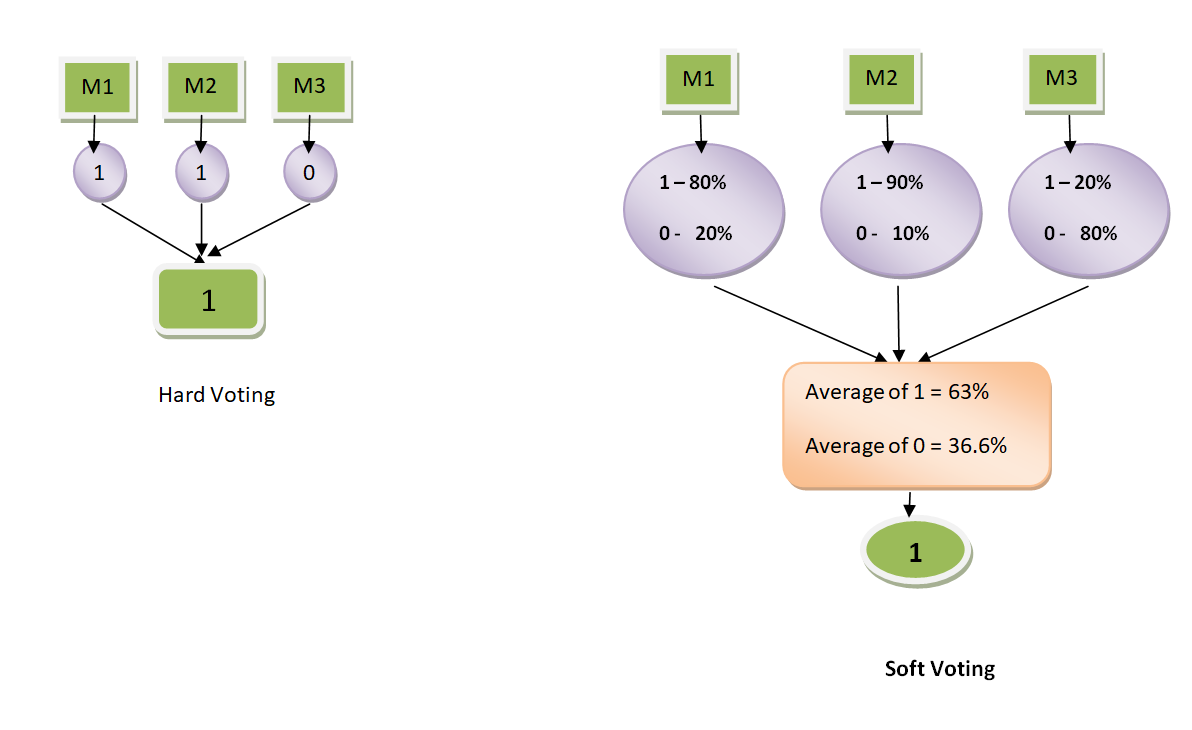

### 앙상블 모델 (2) ― 배깅(Bagging) - RandomForest ⭐

<u>같은</u> 유형의 알고리즘 모델들을 결합하여 예측하는 방법을 배깅(bagging)이라고 한다. <u>같은 유형의 알고리즘을 조합</u>하되, 각각 <u>서로 다른 데이터를 샘플링</u>하여 학습한다. 예를 들어 앞서 살펴본 Decision Tree는 한 개의 트리를 사용하는데 반면 Random Forest는 트리 모델을 여러 개 사용하여 각 모델의 개별 예측값을 보팅을 통해 결정한다. Random Forest는 부트스트랩 샘플(랜덤 뽑기, 중복허용)을 사용하고 랜덤하게 일부 특성을 선택해 트리를 만드는 것이 특징이다.

* `Voting`이 서로 다른 유형의 모델에서 같은 데이터로 학습시켜 투표로 고르는 방식이었다면, 
* `Bagging`은 같은 유형의 모델들이 서로 다른 샘플링 데이터를 학습하는 방식이다.

In [40]:
# 모델 학습 및 검증
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, n_jobs=-1)
rfc.fit(X_train, y_train)

y_rfc_pred = rfc.predict(X_test)
print("예측값: ", y_rfc_pred)

rfc_acc = accuracy_score(y_test, y_rfc_pred)
print(f"Accuracy: {rfc_acc:.4f}")

예측값:  [1 2 0 0 0 0 0 1 1 2 0 0 2 2 0 1 2 0 0 0 0 0 1 0 1 1 2 0 1 0]
Accuracy: 0.9333


모델 생성 시 `n_estimators`는 '개별 트리의 수', `max_depth`는 '트리의 최대 높이'를 의미한다.

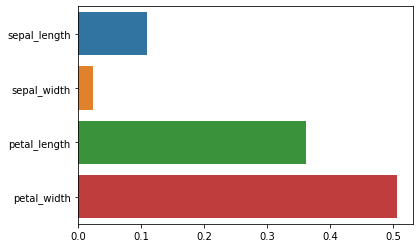

In [41]:
# tree 계열 알고리즘의 feature importance 그래프
importance = rfc.feature_importances_
features_names = df.columns.tolist()
features_names.remove('Target')
_ = sns.barplot(x=importance, y=features_names)

### 앙상블 모델 (3) ― 부스팅(Boosting)

부스팅(boosting) 모델의 원리는 약한 학습기를 결합해 강력한 학습기를 만드는 것이다. 여러 개의 가벼운 모델을 순차적으로 학습하며, 가중치 부여를 통해 예측 오차를 줄이면서 학습한다. 여러 모델을 동시에 학습하지 않고 순서대로 학습하는 점에서 배깅과 다르다.
사이킷런의 `GBM`과 별도 히스토그램 기반 그레디언트 부스팅 라이브러리 `XGBoost`, `LightGBM` 등이 있다.
이들은 캐글, 데이콘 등 경진 대회에서 가장 많이 사용되는 알고리즘의 하나로, 모델 학습 속도가 빠르고 예측력이 상당히 좋은 편으로 알려져 있다.

In [42]:
# 모델 학습 및 검증
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=50, max_depth=3, n_jobs=-1)
xgbc.fit(X_train, y_train)

y_xgbc_pred = xgbc.predict(X_test)
print("예측값: ", y_xgbc_pred)

xgbc_acc = accuracy_score(y_test, y_xgbc_pred)
print(f"Accuracy: {xgbc_acc:.4f}")

예측값:  [1 2 0 0 0 0 0 1 1 2 0 0 2 2 0 1 2 0 0 0 0 0 1 0 1 1 2 0 1 0]
Accuracy: 0.9333


### Bagging VS. Boosting
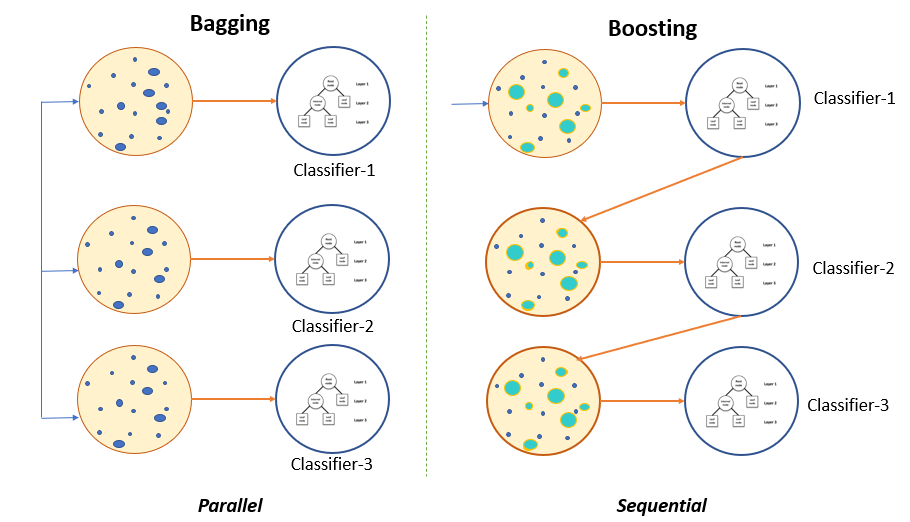

## 교차 검증 (Cross Validation)

### 교차 검증 (1) ― Hold-out

학습(train) 데이터 일부를 검증(validation) 데이터로 사용하는 방법이다. train셋으로 모델을 훈련시키고, validation셋을 통해 모델의 최적 파라미터들을 찾아가고, 그 다음 test셋을 이용해서 모델의 성능을 평가하는 것이다. 결과적으로 테스트 데이터에 대한 예측력을 높일 수 있다.

`train_test_split()`을 사용해 기존 학습 데이터 중 30%를 검증 데이터(X_val, y_val)로, 나머지 70%를 훈련용 데이터(X_tr, y_tr)으로 분할

In [43]:
# 검증용 데이터셋 분리
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.33, shuffle=True)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(79, 4) (79,)
(40, 4) (40,)


In [44]:
# RandomForest 모델을 예시로 해봄
rfc = RandomForestClassifier(n_estimators=50, max_depth=30)
rfc.fit(X_tr, y_tr)

y_tr_pred = rfc.predict(X_tr)
y_val_pred = rfc.predict(X_val)

tr_acc = accuracy_score(y_tr, y_tr_pred)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Train Accuracy: {tr_acc: .4f}")
print(f"Validation Accuracy: {val_acc: .4f}")

Train Accuracy:  1.0000
Validation Accuracy:  0.9750


훈련 데이터(`X_train`, `y_train`)를 입력해 학습시키고, 검증 데이터(`X_val`, `y_val`)로 모델의 성능을 평가한다. 훈련 정확도와 검증 정확도를 비교하여 overfitting 혹은 underfitting 여부를 확인해볼 수 있다.

In [45]:
# 테스트 데이터 예측 및 평가
y_test_pred = rfc.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc: .4f}")

Test Accuracy:  0.9333


### 교차 검증 (2) ― K-fold

`홀드아웃 검증`에서는 학습 데이터를 훈련용과 검증용으로 한번 분할하여 모델 성능을 검증했다. 그러한 홀드아웃 방법을 여러 번 반복하는 것이 `K-fold 교차 검증`이다.

전체 데이터를 k개의 부분 집합으로 나누고, 그 중에서 첫 번째 부분집합(Fold 1)을 검증용으로 사용하고 나머지 k-1개의 집합을 모델 훈련에 사용한다(검증 1). 그 다음 두 번쨰 부분집합(Fold 2)을 검증용으로 사용하여 모델 성능을 평가한다(검증 2). ... 마지막 k번째 부분집합(Fold k)을 검증용으로 사용하여 모델을 학습한다(검증 k). 데이터를 서로 겹치지 않게 분할하여 모두 k번 검증하므로 모델의 일반화 성능을 평가하는 데 있어 홀드아웃보다 낫다.

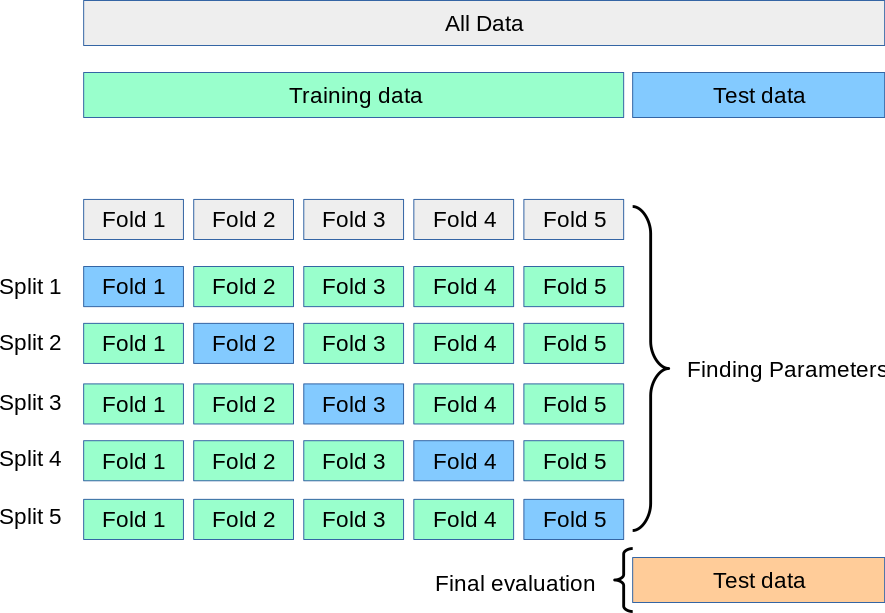

In [46]:
# 데이터셋을 5개의 Fold로 분할하는 KFold 클래스 객체 생성
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)

# 훈련용 데이터와 검증용 데이터의 행 인덱스를 각 Fold별로 구분하여 생성
num_fold = 1
for tr_idx, val_idx in kfold.split(X_train):
    print(f"{num_fold} Fold ------------------------------------")
    print("- 훈련:", len(tr_idx), tr_idx[:10])
    print("- 검증:", len(val_idx), val_idx[:10])
    num_fold += 1

1 Fold ------------------------------------
- 훈련: 95 [0 1 2 3 4 5 6 7 8 9]
- 검증: 24 [13 19 22 24 29 36 40 42 44 47]
2 Fold ------------------------------------
- 훈련: 95 [ 0  1  2  4  5  6  7  8 10 11]
- 검증: 24 [ 3  9 12 17 21 27 30 31 38 51]
3 Fold ------------------------------------
- 훈련: 95 [ 0  1  3  5  9 10 11 12 13 14]
- 검증: 24 [ 2  4  6  7  8 16 20 26 28 32]
4 Fold ------------------------------------
- 훈련: 95 [ 2  3  4  6  7  8  9 10 12 13]
- 검증: 24 [ 0  1  5 11 18 34 37 46 52 57]
5 Fold ------------------------------------
- 훈련: 96 [0 1 2 3 4 5 6 7 8 9]
- 검증: 23 [10 14 15 23 25 35 41 43 48 54]


In [47]:
val_scores = []
num_fold = 1
for tr_idx, val_idx in kfold.split(X_train, y_train):
    # 훈련/검증용 데이터를 행 인덱스 기준으로 추출
    X_tr, X_val = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    # 학습
    rfc = RandomForestClassifier(max_depth=3)
    rfc.fit(X_train, y_train)
    # 검증
    y_val_pred = rfc.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    print(f"{num_fold} Fold Accuracy: {val_acc:.4f}")
    val_scores.append(val_acc)
    num_fold += 1

1 Fold Accuracy: 1.0000
2 Fold Accuracy: 0.9583
3 Fold Accuracy: 1.0000
4 Fold Accuracy: 1.0000
5 Fold Accuracy: 0.9565
